In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from pneumococcus_data import data_observation

In [2]:
Iran, Denmark, Brazil, Nepal, Mozambique = data_observation()

#two orders
order1 = np.array([Brazil, Denmark, Mozambique, Iran, Nepal], dtype = object)
order2 = np.array([Nepal, Brazil, Denmark, Mozambique, Iran], dtype = object)
order = np.array([order1, order2], dtype = object)

#list of all 92 strains
all_strain = ['16', '23B', '33B', '7C', '23F', 'NT3b', '9V', '5', '35F', '24F', '12F', '9', '9L', 'NT2', '20', '45', '35A', 
              '19C', '10', '24A', '19F', '33C', 'NT4a', '40', '15A', '6D', '7B', '6A', '4', '11A', '33A', '46', '4B', '23A', 
              '19', '18A', '6A/6B', '11B', '38', '33F', '29', '18F', '13', '15C', 'NT', '6C', '18B', '11D', '17A', '21', '31', 
              '22F', '36', '8', '9A', '19B', '28F', '24B', '48', '6B', '23C', '10A', '12F/12A/4', '25F', '35B', '19A', '18C', 
              '39', '17F', 'NT4b', '28A', '1', '22A', '32F', '6', '35C', '15B', '37', '17', '18', 'NC', '15', '23', '11', 
              '10F', '14', '3', '9N', '16F', '34', '22', '7F']

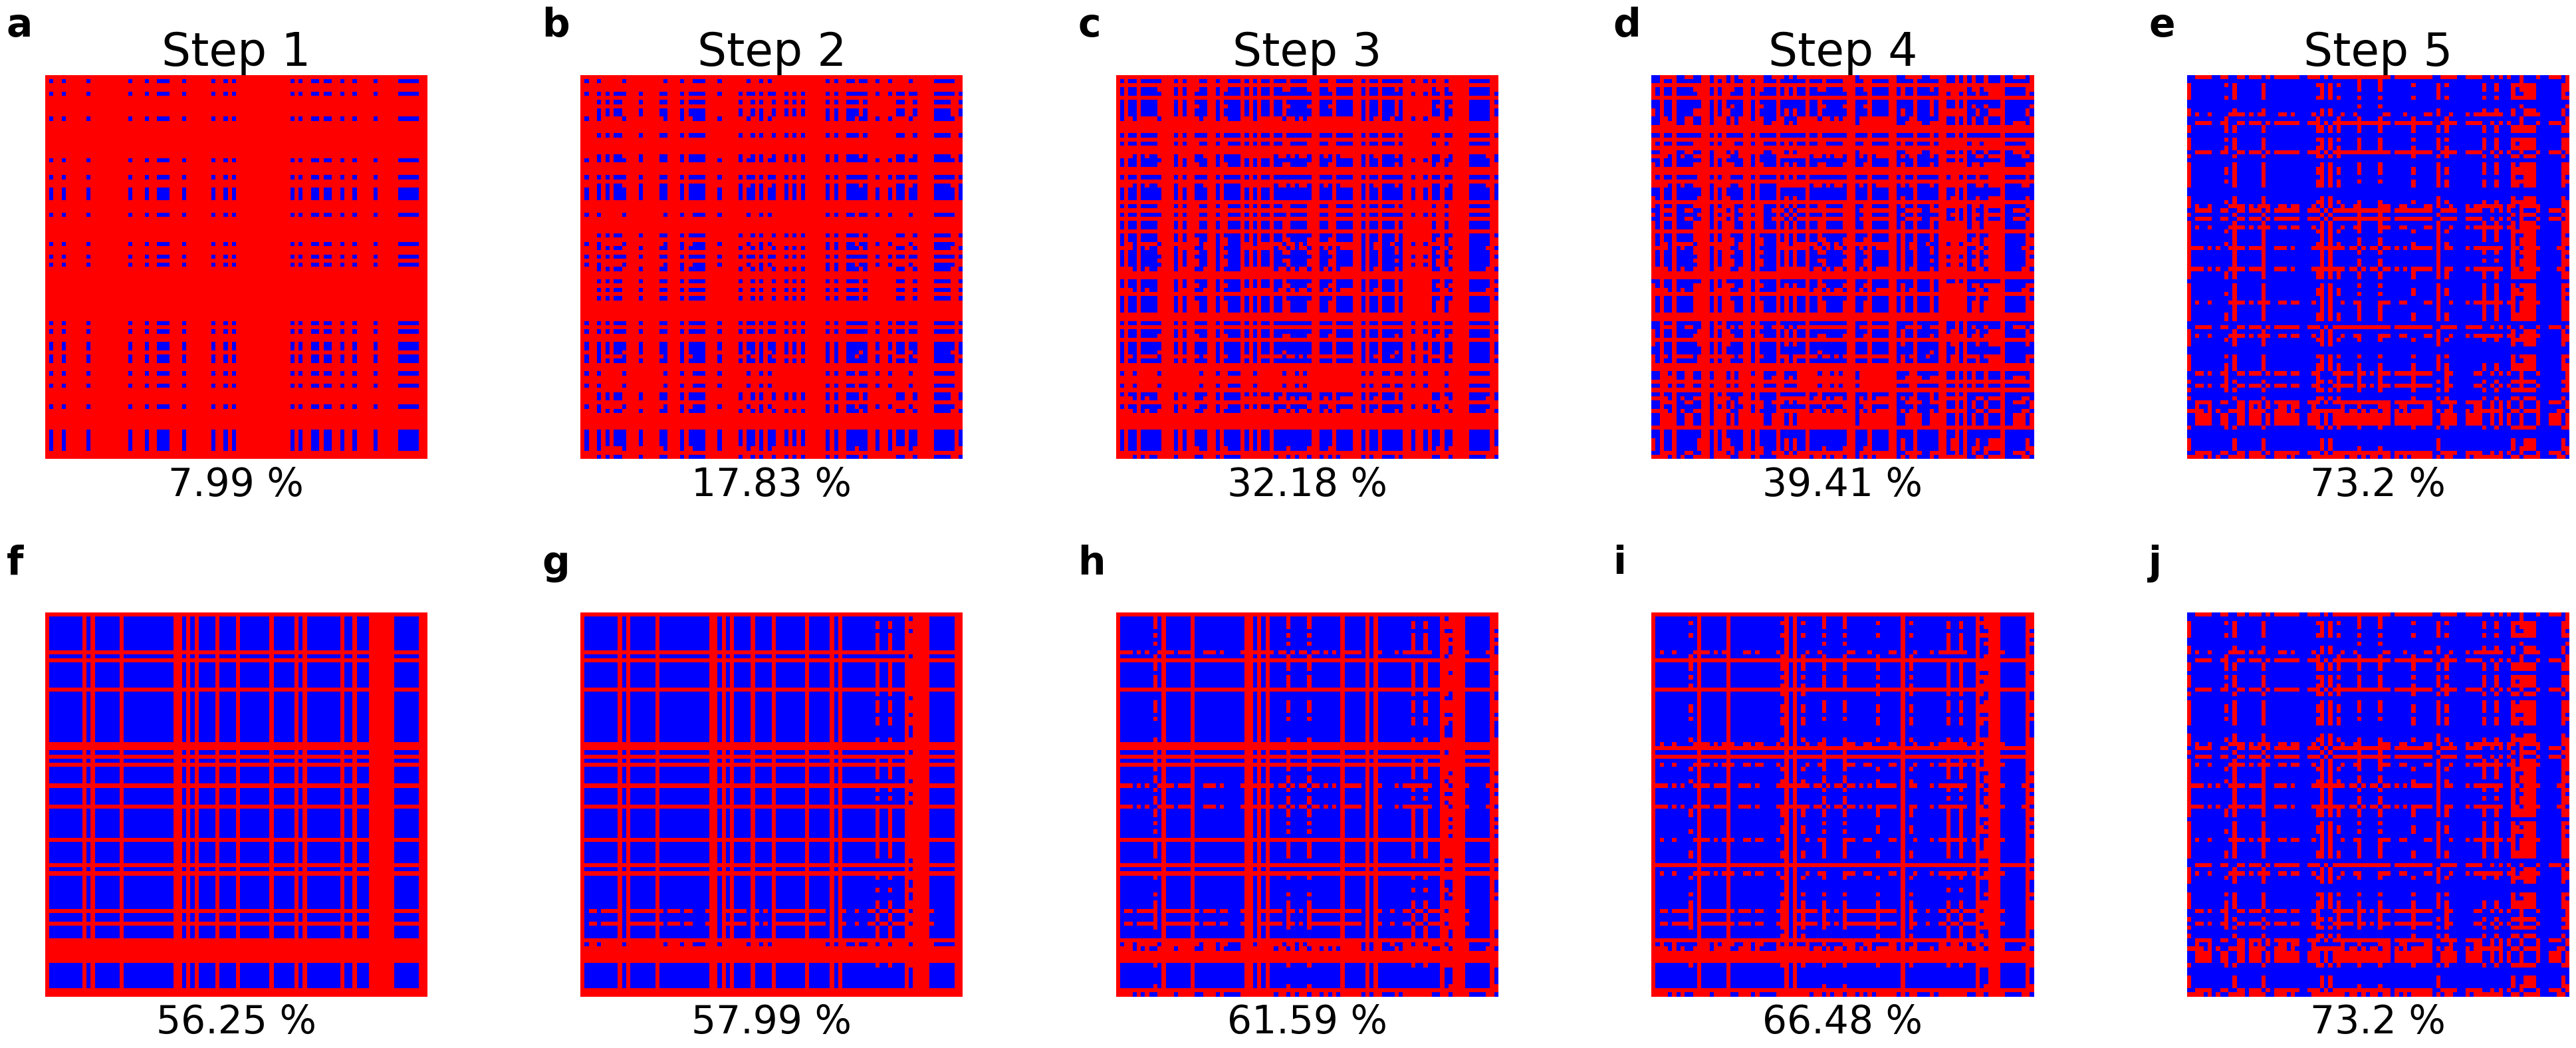

In [4]:
fig, ax = plt.subplots(2, 5, figsize=(49, 18))
fig.subplots_adjust(wspace = 0.4, hspace = 0.4)

name_step = np.array(['Step 1', 'Step 2', 'Step 3', 'Step 4', 'Step 5'])
abc = np.array([['a', 'b', 'c', 'd', 'e'], ['f', 'g', 'h', 'i', 'j']])


for i in range (0, 2):
    order_country = order[i]
    temp_matrix = np.ones((92, 92))*50

    for j in range (0, 5):        
        country = order_country[j]
        country_strain = np.array(country.strain)
            
        for xBA, strain_xBA in enumerate(all_strain):
            for yBA, strain_yBA in enumerate(all_strain):
        
                find_x = np.where(country_strain == strain_xBA)
                index_x = find_x[0]
        
                find_y = np.where(country_strain == strain_yBA)
                index_y = find_y[0]
            
                if index_x.size > 0 and index_y.size > 0:
                    temp_matrix[xBA, yBA] = 0
        percent = (1 - np.count_nonzero(temp_matrix)/92**2)*100 
        percent = np.round(percent, 2)
        
        sns.heatmap(temp_matrix, ax = ax[i,j], vmin = 0, center = 25, vmax = 50, cmap = "bwr",
                    cbar = False, xticklabels = False, yticklabels = False)
        ax[i,j].set_xlabel(f'{percent} %', fontsize = 42)
        ax[i,j].text(-.1, 1.1, f'{abc[i,j]}', transform = ax[i,j].transAxes, fontsize = 42, weight='bold')

for j in range (0, 5):
    ax[0,j].set_title(f'{name_step[j]}', fontsize = 50)

plt.show()

In [5]:
fig.savefig('block_matrix_process.png', dpi = 300, bbox_inches='tight')